## Get Data

1. **`battery_power`**: Dung lượng pin (mAh).  -
2. **`blue`**: Hỗ trợ Bluetooth (1: Có, 0: Không). -  
3. **`clock_speed`**: Tốc độ CPU (GHz).  -
4. **`dual_sim`**: Hỗ trợ SIM kép (1: Có, 0: Không).  
5. **`fc`**: Camera trước (MP).  
6. **`four_g`**: Hỗ trợ 4G (1: Có, 0: Không).  -
7. **`int_memory`**: Bộ nhớ trong (GB).  -
8. **`m_dep`**: Độ dày máy (cm).  
9. **`mobile_wt`**: Trọng lượng (g). -
10. **`n_cores`**: Số nhân CPU.  -
11. **`pc`**: Camera sau (MP).  -
12. **`px_height`**: Độ cao màn hình (pixel).  -
13. **`px_width`**: Độ rộng màn hình (pixel). -
14. **`ram`**: Dung lượng RAM (MB).  -
15. **`sc_h`**: Chiều cao máy (cm).  
16. **`sc_w`**: Chiều rộng máy (cm).  
17. **`talk_time`**: Thời gian đàm thoại (giờ).  
18. **`three_g`**: Hỗ trợ 3G (1: Có, 0: Không).  
19. **`touch_screen`**: Màn hình cảm ứng (1: Có, 0: Không). -
20. **`wifi`**: Hỗ trợ WiFi (1: Có, 0: Không). -
21. **`price_range`**: Phân khúc giá (0-3).  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv"
df = pd.read_csv(url)
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
print(df['n_cores'].unique())

[2 3 5 6 1 8 4 7]


## EDA

<ipython-input-2-0abd2f5a35e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range', palette='viridis')


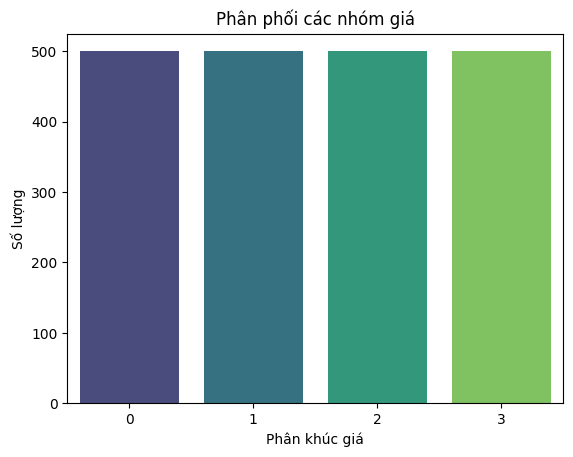

In [ ]:
# Phân phối của nhãn 'price_range'
sns.countplot(data=df, x='price_range', palette='viridis')
plt.title("Phân phối các nhóm giá")
plt.xlabel("Phân khúc giá")
plt.ylabel("Số lượng")
plt.show()


- Phân bố đồng đều: Số lượng sản phẩm trong các nhóm giá khá đồng đều. Điều này cho thấy nhà sản xuất có chiến lược đa dạng hóa sản phẩm, đáp ứng nhiều phân khúc khách hàng khác nhau.
- Không có nhóm giá nào chiếm ưu thế quá lớn: Việc không có một nhóm giá nào chiếm tỷ lệ quá cao cho thấy sản phẩm được phân phối khá cân bằng trên thị trường.

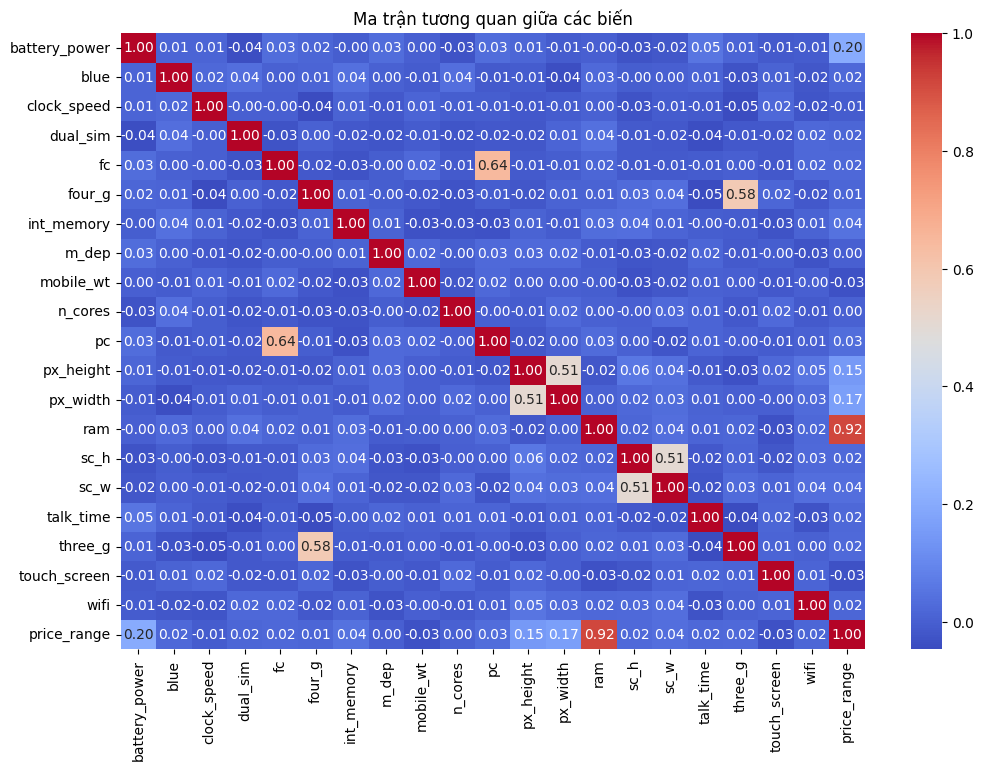

In [ ]:
# Ma trận tương quan
corr_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các biến")
plt.show()


Nhận xét chung từ biểu đồ:
  - Màu sắc: Màu đỏ thể hiện mối tương quan dương mạnh, màu xanh lam thể hiện mối tương quan âm mạnh, và màu trắng gần như không có tương quan.
* Các cặp biến có tương quan cao:
  - Màn hình và giá: Kích thước màn hình (px_height và px_width) có tương quan dương khá mạnh với giá cả. Điều này hợp lý vì các điện thoại màn hình lớn thường có cấu hình cao hơn và giá thành cao hơn.
  - RAM và giá: Dung lượng RAM có tương quan dương rất mạnh với giá cả. RAM càng lớn, hiệu năng của điện thoại càng cao và thường đi kèm với các tính năng cao cấp khác, dẫn đến giá thành cao hơn.
  - Camera trước và giá: Số lượng camera trước (fc) có tương quan dương khá mạnh với giá cả. Điều này cho thấy các điện thoại có nhiều camera trước thường là các mẫu cao cấp.
  - Camera sau và giá: Số lượng camera sau (sc_h và sc_w) có tương quan dương khá mạnh với giá cả. Tương tự như camera trước, số lượng camera sau cũng là một yếu tố ảnh hưởng đến giá thành.
    - 3G và 4G: Các biến biểu thị hỗ trợ 3G (three_g) và 4G (four_g) có tương quan dương khá mạnh với nhau. Điều này cho thấy các điện thoại hỗ trợ 4G thường cũng hỗ trợ 3G.
* Các cặp biến có tương quan âm:
  - Thời gian đàm thoại và giá: Thời gian đàm thoại (talk_time) có tương quan âm nhẹ với giá cả. Điều này có thể do các điện thoại cao cấp thường ưu tiên các tính năng khác như màn hình lớn, camera tốt hơn là thời lượng pin.

# Mục mới

1. Phân giải (độ nét): px_height, px_width.

2. Camera: fc, pc.

3. Tốc độ xử lý máy: clock_speed, n_cores.
4. Pin: battery_power, talk_time.
5. Dung lượng: ram, int_memory.
6. Thiết kế (kích thước, trọng lượng): mobile_wt, m_dep, sc_h, sc_w.
7. Tính năng hỗ trợ (Connectivity): dual_sim, blue, touch_screen, three_g, four_g, wifi

#### Camera: fc, pc.

<ipython-input-7-d6b88eecbba3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="magma")
<ipython-input-7-d6b88eecbba3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="magma")


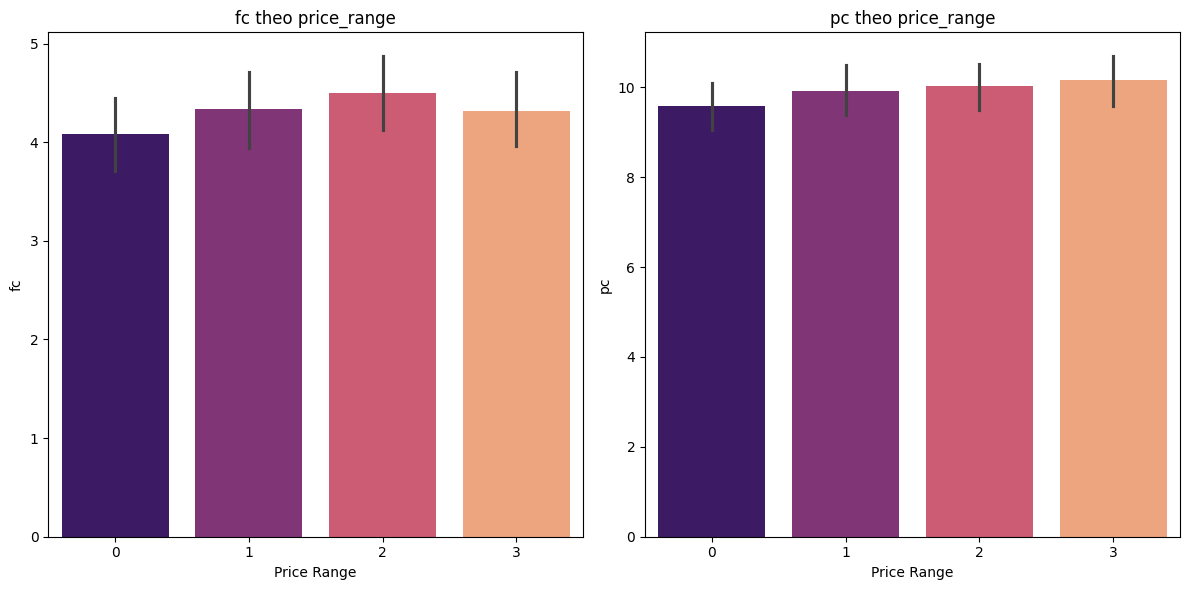

In [ ]:


camera_cols = ['fc', 'pc']

plt.figure(figsize=(12, 6))  # Adjust figure size for subplots

for i, col in enumerate(camera_cols):
    plt.subplot(1, 2, i + 1)  # Create subplots
    sns.barplot(data=df, x='price_range', y=col, palette="magma")
    plt.title(f'{col} theo price_range')
    plt.xlabel('Price Range')
    plt.ylabel(col)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

> Nhận xét:
Các nhóm phân khúc giá không có sự khác biệt lớn về phạm vi giữa các phần tư của fc và pc, nhưng sự xuất hiện của các giá trị ngoại lai cho thấy có một số sản phẩm độ phân giải cam trước vượt trội trong từng phân khúc. Có thể dành cho các đối tượng Selfie

#### Tốc độ xử lý máy: clock_speed, n_cores.

<ipython-input-70-f5625cd8bdd8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette="coolwarm")
<ipython-input-70-f5625cd8bdd8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette="coolwarm")


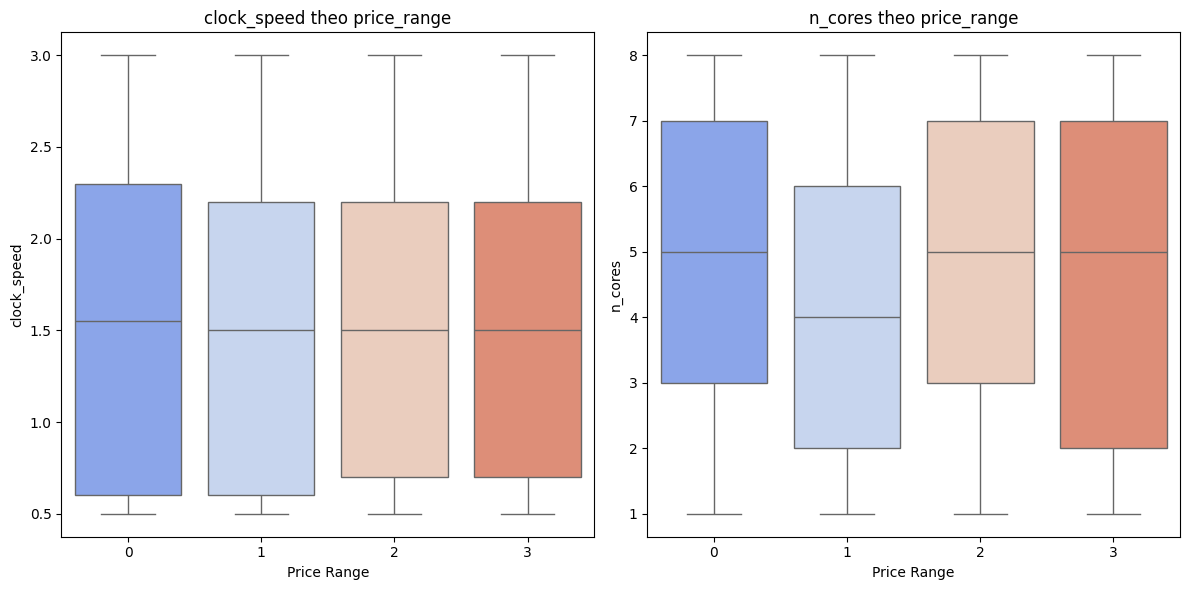

In [ ]:
speed_cols = ['clock_speed', 'n_cores']

plt.figure(figsize=(12, 6))

for i, col in enumerate(speed_cols):
    plt.subplot(1, 2, i + 1)  # Create subplots
    sns.boxplot(data=df, x='price_range', y=col, palette="coolwarm")
    plt.title(f'{col} theo price_range')
    plt.xlabel('Price Range')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

* Nhận xét chung:
  - Xu hướng chung: Cả hai biến clock_speed và n_cores đều có xu hướng giảm khi giá tăng. Điều này có nghĩa là, các thiết bị có giá cao hơn thường có tốc độ xung nhịp và số lượng lõi thấp hơn so với các thiết bị có giá thấp hơn.
*Phân bố:
  - Clock_speed: Phân bố của clock_speed tương đối đồng đều giữa các mức giá, với một số ngoại lệ ở mức giá cao nhất.
  -N_cores: Phân bố của n_cores cũng tương đối đồng đều, nhưng có sự phân tán lớn hơn ở mức giá cao nhất.
  - Giá trị ngoại lệ: Cả hai biểu đồ đều có một số giá trị ngoại lệ, đặc biệt là ở mức giá cao nhất. Điều này có thể cho thấy sự đa dạng lớn của các thiết bị trong cùng một phân khúc giá.

####  Pin: battery_power, talk_time.

<ipython-input-71-316d32716638>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette="rocket")
<ipython-input-71-316d32716638>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette="rocket")


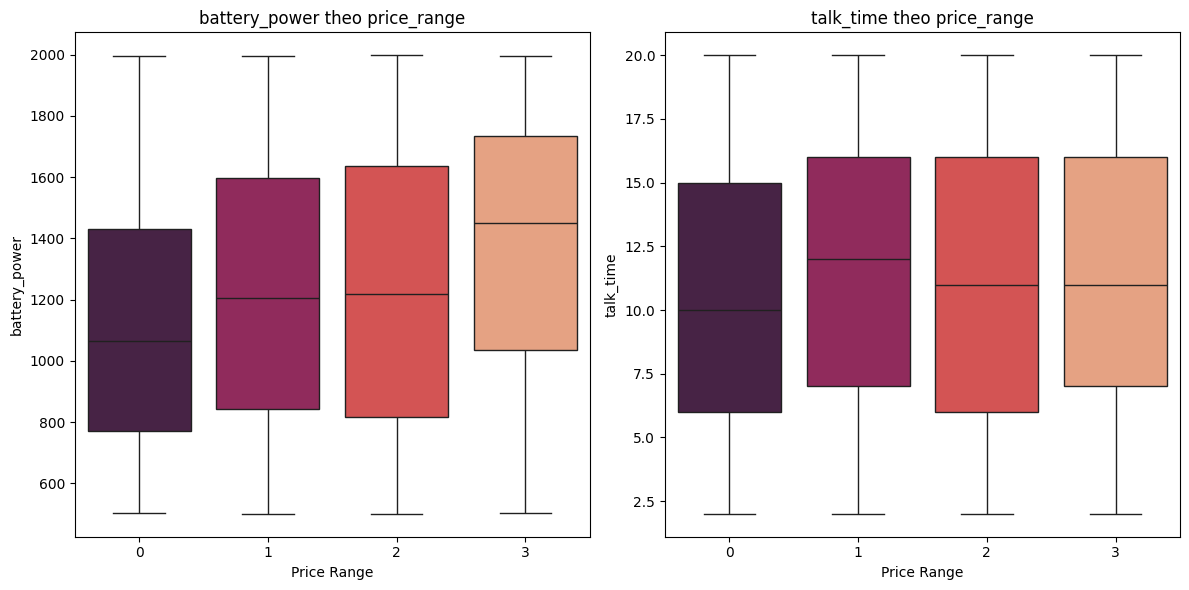

               battery_power  talk_time  price_range
battery_power       1.000000   0.052510     0.200723
talk_time           0.052510   1.000000     0.021859
price_range         0.200723   0.021859     1.000000


In [ ]:
battery_cols = ['battery_power', 'talk_time']

plt.figure(figsize=(12, 6))

for i, col in enumerate(battery_cols):
    plt.subplot(1, 2, i + 1)  # Create subplots
    sns.boxplot(data=df, x='price_range', y=col, palette="rocket")
    plt.title(f'{col} theo price_range')
    plt.xlabel('Price Range')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
print(df[['battery_power', 'talk_time', 'price_range']].corr())


* Nhận xét chung:
  - Dung lượng pin:
    -Xu hướng tăng dần: Nhìn chung, dung lượng pin có xu hướng tăng theo các phân khúc giá cao hơn. Điều này cho thấy các thiết bị ở phân khúc giá cao hơn thường được trang bị pin có dung lượng lớn hơn, đáp ứng nhu cầu sử dụng lâu dài của người dùng.
    - Sự phân tán: Tuy nhiên, sự phân tán của dữ liệu về dung lượng pin ở mỗi phân khúc giá là khá lớn, cho thấy có sự đa dạng về dung lượng pin trong cùng một phân khúc giá.
  -Thời gian đàm thoại:
    - Xu hướng tương đối ổn định: Thời gian đàm thoại không có sự thay đổi quá lớn giữa các phân khúc giá. Điều này có thể do nhiều yếu tố ảnh hưởng đến thời gian đàm thoại, không chỉ dung lượng pin mà còn công nghệ pin, hiệu năng của thiết bị, và các yếu tố phần mềm khác.
    - Sự phân tán: Tương tự như dung lượng pin, sự phân tán của dữ liệu về thời gian đàm thoại cũng khá lớn, cho thấy sự đa dạng về thời lượng pin trong cùng một phân khúc giá.
Nhận xét chi tiết từng phân khúc giá:
  -Phân khúc giá 0:
    - Dung lượng pin thấp nhất so với các phân khúc khác, cho thấy các thiết bị ở phân khúc này thường có thời lượng sử dụng ngắn hơn.
    - Thời gian đàm thoại cũng ở mức trung bình so với các phân khúc khác.
- Phân khúc giá 1:
  + Dung lượng pin có sự cải thiện đáng kể so với phân khúc 0, cho thấy các thiết bị ở phân khúc này có thể đáp ứng tốt hơn nhu cầu sử dụng hàng ngày.
Thời gian đàm thoại cũng được cải thiện nhẹ so với phân khúc 0.
- Phân khúc giá 2:
  + Dung lượng pin tiếp tục tăng, đạt mức cao nhất trong các phân khúc. Điều này cho thấy các thiết bị ở phân khúc này thường được trang bị pin dung lượng lớn để đáp ứng nhu cầu sử dụng cao.
  + Thời gian đàm thoại cũng ở mức cao, tương đương với phân khúc 1.
- Phân khúc giá 3:
  + Dung lượng pin cao nhất, nhưng sự phân tán dữ liệu lớn cho thấy có cả những thiết bị có dung lượng pin rất cao và những thiết bị có dung lượng pin ở mức trung bình.
  + Thời gian đàm thoại cũng ở mức cao, tương đương với các phân khúc khác.

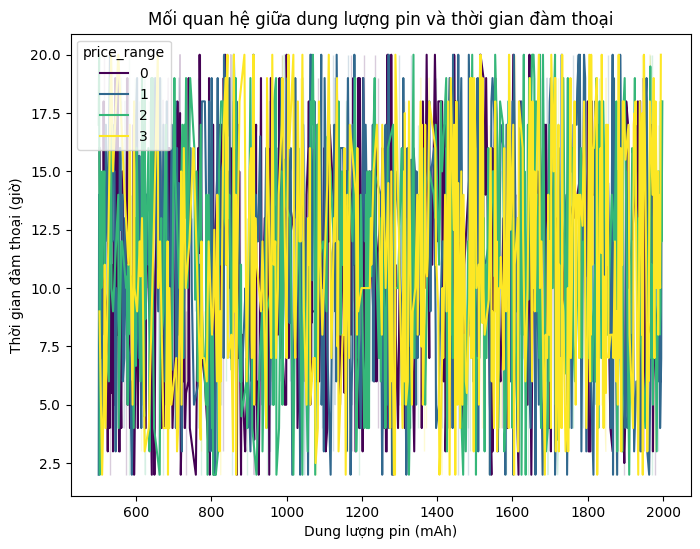

In [ ]:

plt.figure(figsize=(8, 6))
sns.lineplot(x='battery_power', y='talk_time', data=df, hue='price_range', palette='viridis')
plt.title('Mối quan hệ giữa dung lượng pin và thời gian đàm thoại')
plt.xlabel('Dung lượng pin (mAh)')
plt.ylabel('Thời gian đàm thoại (giờ)')
plt.show()

Nhận xét chung:
  - Xu hướng chung: Nhìn chung, biểu đồ cho thấy một xu hướng rõ ràng: Dung lượng pin càng lớn thì thời gian đàm thoại càng lâu. Điều này hoàn toàn hợp lý, vì dung lượng pin lớn hơn có nghĩa là thiết bị có nhiều năng lượng hơn để hoạt động.
  - Sự phân tán dữ liệu: Tuy nhiên, biểu đồ cũng cho thấy sự phân tán dữ liệu khá lớn, nghĩa là không phải tất cả các thiết bị đều tuân theo quy luật này một cách tuyệt đối. Có một số thiết bị có dung lượng pin lớn nhưng thời gian đàm thoại lại không cao, và ngược lại.
  - Ảnh hưởng của yếu tố khác:
      + Sự phân tán này có thể do nhiều yếu tố khác tác động, như:
      + Công nghệ pin: Các loại pin khác nhau (Li-ion, Li-Po,...) có hiệu suất khác nhau.
      + Hiệu suất phần cứng: Chipset, màn hình, các cảm biến,... tiêu thụ năng lượng khác nhau.
      + Hệ điều hành: Hệ điều hành và các ứng dụng chạy nền cũng ảnh hưởng đến thời lượng pin.
      + Thói quen sử dụng: Cách người dùng sử dụng thiết bị (độ sáng màn hình, kết nối mạng,...) cũng ảnh hưởng đến thời gian sử dụng pin.
- Phân tích theo phân khúc giá
  + Phân khúc giá: Biểu đồ sử dụng màu sắc để phân biệt các phân khúc giá khác nhau.
  + Không có sự khác biệt rõ ràng: Có vẻ như không có sự khác biệt quá rõ ràng về xu hướng giữa các phân khúc giá. Các thiết bị ở mọi phân khúc giá đều cho thấy mối quan hệ tương tự giữa dung lượng pin và thời gian đàm thoại.
  +Sự đa dạng: Tuy nhiên, trong mỗi phân khúc giá vẫn có sự đa dạng về hiệu suất pin, cho thấy các yếu tố khác ngoài giá cả cũng đóng vai trò quan trọng..

#### Dung lượng: ram, int_memory.

<ipython-input-73-e35a4f1c6785>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette="cubehelix")
<ipython-input-73-e35a4f1c6785>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette="cubehelix")


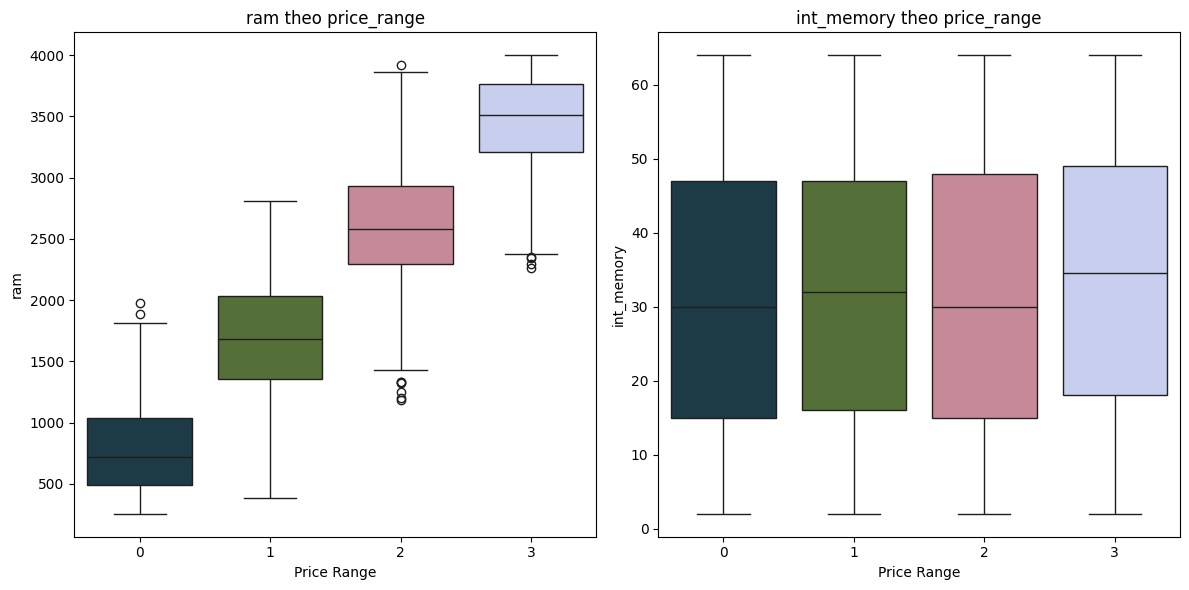

In [ ]:

memory_cols = ['ram', 'int_memory']

plt.figure(figsize=(12, 6))  # Adjust figure size for subplots

for i, col in enumerate(memory_cols):
    plt.subplot(1, 2, i + 1)  # Create subplots
    sns.boxplot(data=df, x='price_range', y=col, palette="cubehelix")
    plt.title(f'{col} theo price_range')
    plt.xlabel('Price Range')
    plt.ylabel(col)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

Tổng quan
- Hai biểu đồ boxplot này cung cấp một cái nhìn tổng quan về mối quan hệ giữa phân khúc giá của các thiết bị và hai thông số kỹ thuật quan trọng là RAM và bộ nhớ trong.

Biểu đồ RAM theo phân khúc giá
- Xu hướng chung: Dung lượng RAM có xu hướng tăng dần theo phân khúc giá. Điều này cho thấy các thiết bị ở phân khúc giá cao thường được trang bị RAM lớn hơn để đáp ứng nhu cầu xử lý đa nhiệm và các tác vụ nặng.
- Phân bố:
  + Phân khúc giá thấp (0): Dung lượng RAM tập trung ở mức thấp, với một số ngoại lệ.
  + Phân khúc giá trung bình (1, 2): Dung lượng RAM có sự phân bố rộng hơn, với cả các thiết bị có RAM thấp và RAM cao.
  + Phân khúc giá cao (3): Dung lượng RAM tập trung ở mức cao, với một số thiết bị có RAM rất lớn.
  + Các giá trị ngoại lệ: Có một số thiết bị ở phân khúc giá trung bình và cao có dung lượng RAM vượt trội so với các thiết bị cùng phân khúc. Điều này có thể do các thiết bị này được định vị là các phiên bản cao cấp hoặc chuyên biệt.
- Biểu đồ Bộ nhớ trong theo phân khúc giá:
  + Xu hướng chung: Tương tự như RAM, dung lượng bộ nhớ trong cũng có xu hướng tăng dần theo phân khúc giá. Điều này cho thấy các thiết bị ở phân khúc giá cao thường được trang bị bộ nhớ trong lớn hơn để lưu trữ nhiều dữ liệu hơn.
- Phân bố:
  + Phân khúc giá thấp (0): Dung lượng bộ nhớ trong tập trung ở mức thấp.
  + Phân khúc giá trung bình (1, 2): Dung lượng bộ nhớ trong có sự phân bố rộng hơn, với cả các thiết bị có bộ nhớ trong thấp và bộ nhớ trong cao.
  + Phân khúc giá cao (3): Dung lượng bộ nhớ trong tập trung ở mức cao.
  + Các giá trị ngoại lệ: Cũng giống như biểu đồ RAM, có một số thiết bị ở phân khúc giá trung bình và cao có dung lượng bộ nhớ trong vượt trội so với các thiết bị cùng phân khúc.

#### Thiết kế (kích thước, trọng lượng): mobile_wt, m_dep, sc_h, sc_w

<ipython-input-11-84433fbb40e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="pastel")
<ipython-input-11-84433fbb40e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="pastel")
<ipython-input-11-84433fbb40e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="pastel")
<ipython-input-11-84433fbb40e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

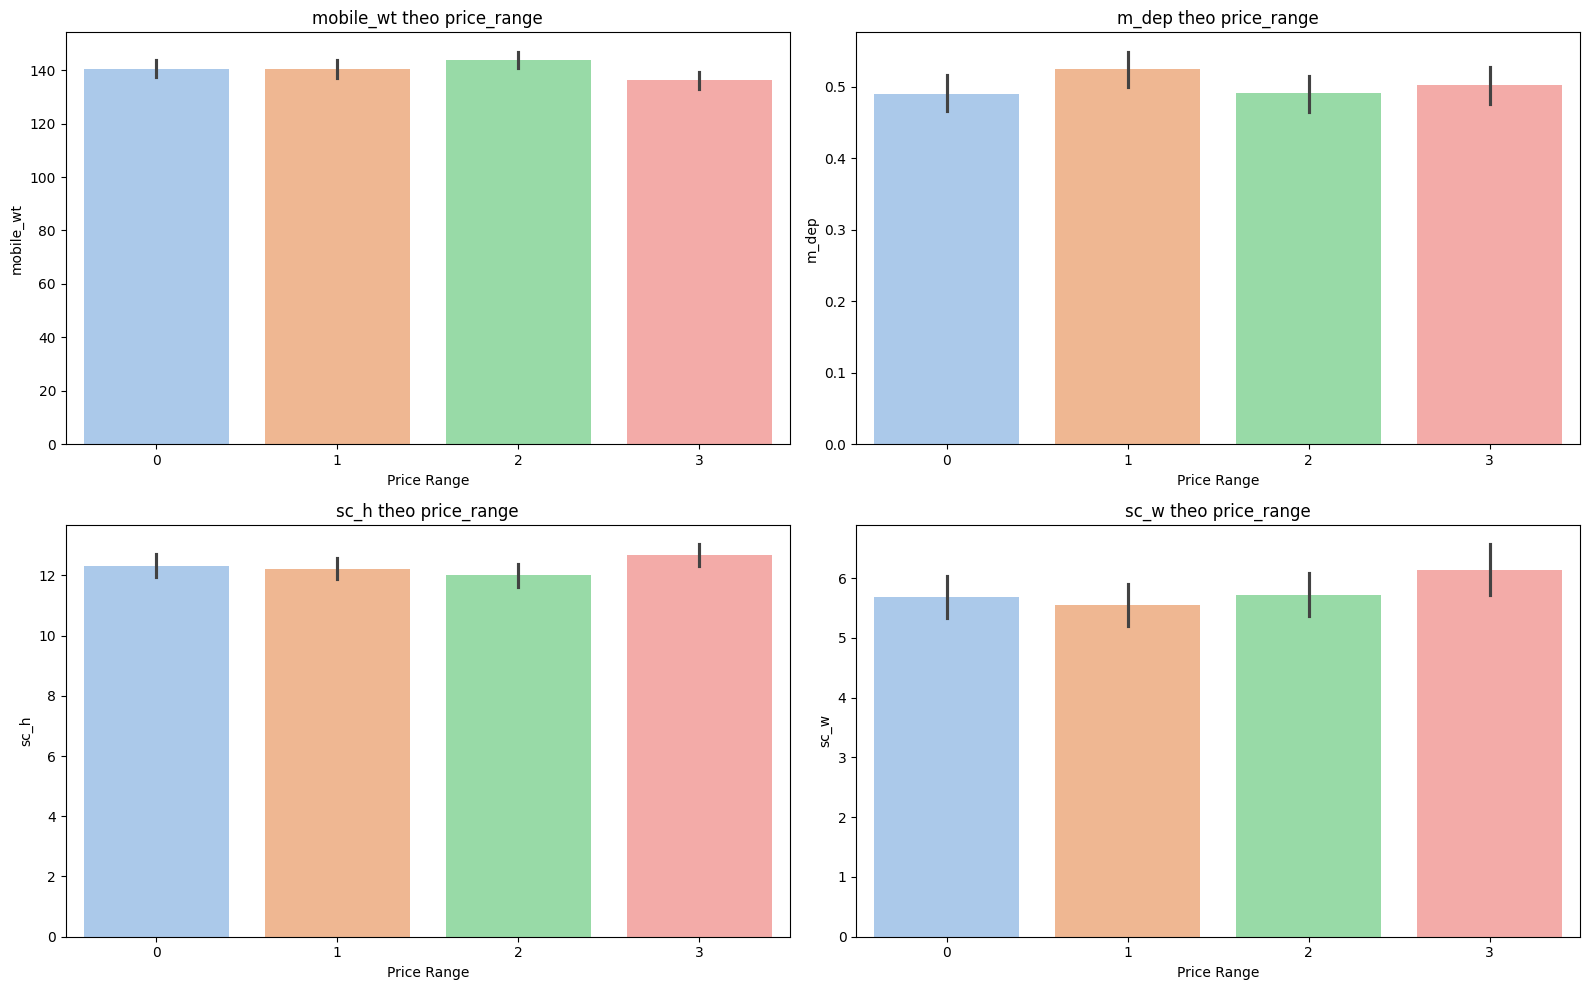

In [ ]:
design_cols = ['mobile_wt', 'm_dep', 'sc_h', 'sc_w']

plt.figure(figsize=(16, 10))  # Adjust figure size as needed

for i, col in enumerate(design_cols):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.barplot(data=df, x='price_range', y=col, palette="pastel")
    plt.title(f'{col} theo price_range')
    plt.xlabel('Price Range')
    plt.ylabel(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#### Tính năng hỗ trợ (Connectivity): dual_sim, blue, touch_screen, three_g, four_g, wifi

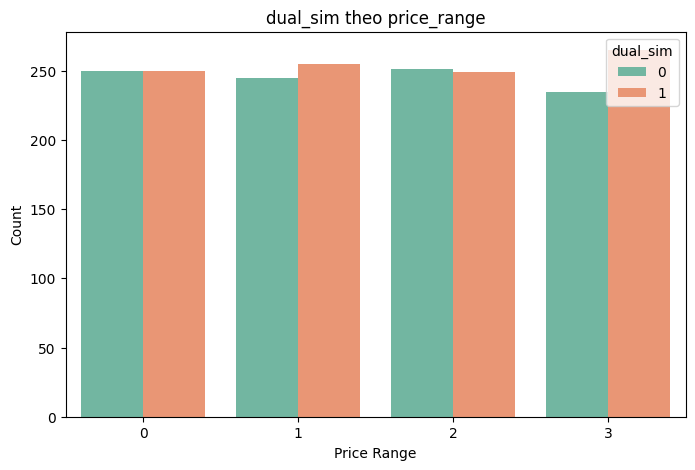

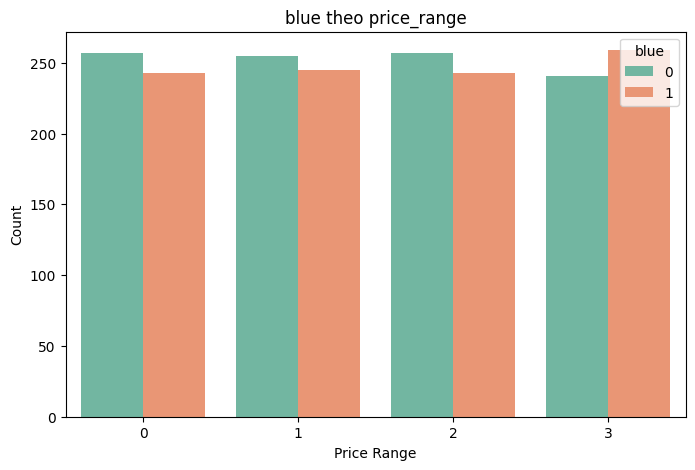

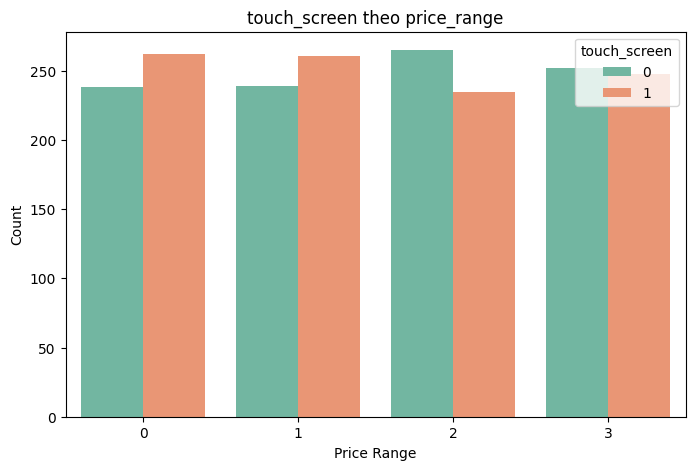

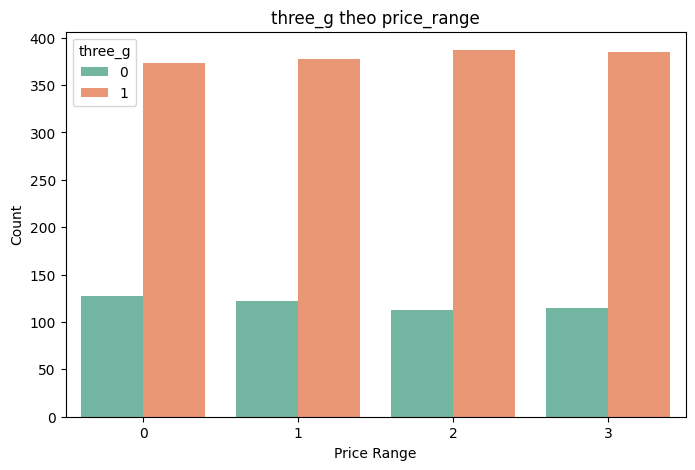

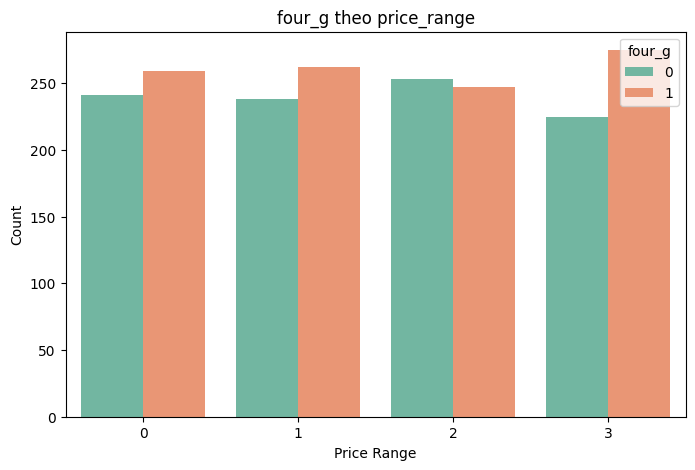

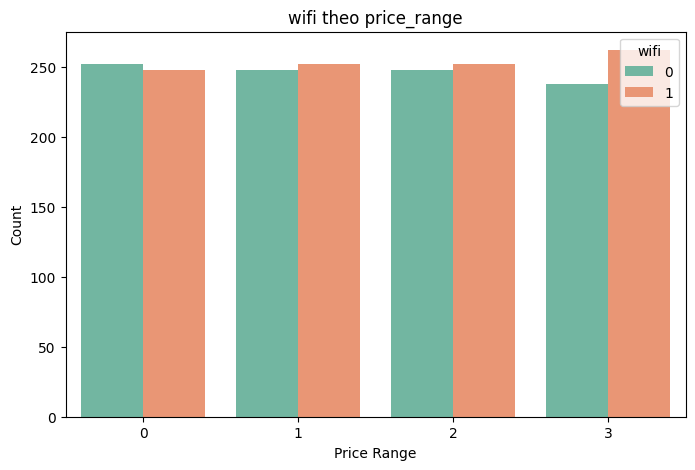

In [ ]:
connectivity_cols = ['dual_sim', 'blue', 'touch_screen', 'three_g', 'four_g', 'wifi']

for col in connectivity_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='price_range', hue=col, palette="Set2")
    plt.title(f'{col} theo price_range')
    plt.xlabel('Price Range')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.show()


#### Phân giải (độ nét): px_height, px_width

<ipython-input-13-ad5ec9a83c72>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="viridis", ax=axes[i])
<ipython-input-13-ad5ec9a83c72>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y=col, palette="viridis", ax=axes[i])


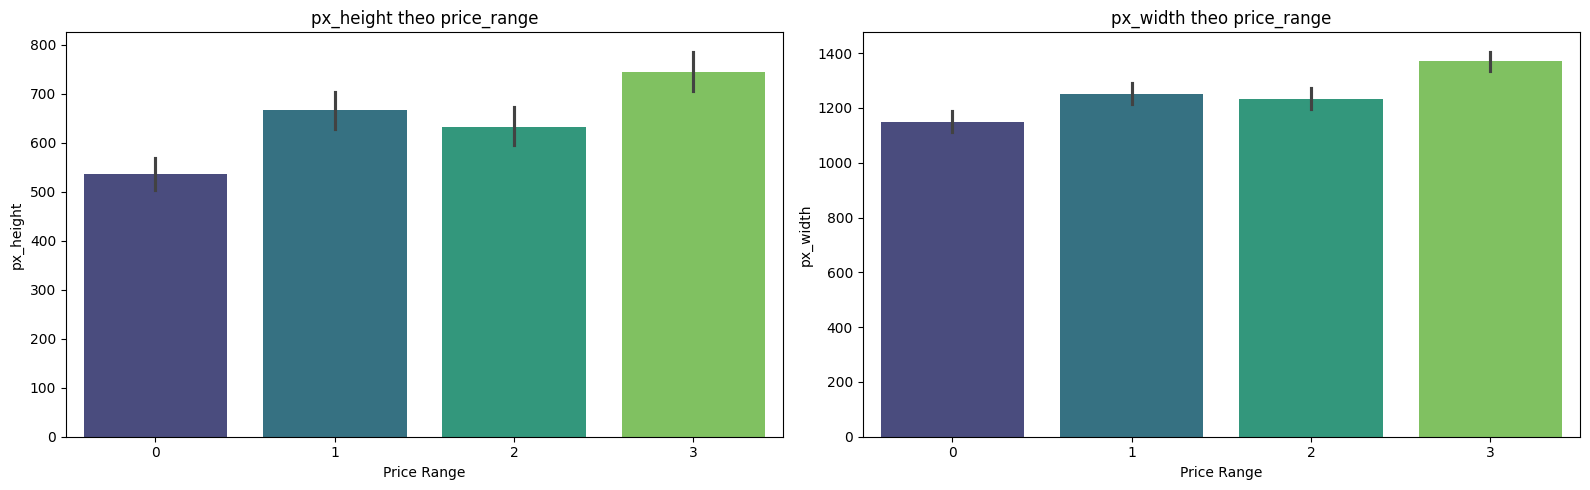

In [ ]:
import numpy as np


resolution_cols = ['px_height', 'px_width']

fig, axes = plt.subplots(1, 2, figsize=(16, 5)) # Create a figure and two subplots

for i, col in enumerate(resolution_cols):
    sns.barplot(data=df, x='price_range', y=col, palette="viridis", ax=axes[i])
    axes[i].set_title(f'{col} theo price_range')
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

- Phân tích biểu đồ về mối quan hệ giữa phân khúc giá và độ phân giải màn hình:

Hai biểu đồ chính:

- px_height theo price_range: Biểu đồ này thể hiện sự thay đổi của số lượng pixel theo chiều cao màn hình khi giá của thiết bị tăng lên.
px_width theo price_range: Biểu đồ này tương tự như biểu đồ trên, nhưng tập trung vào số lượng pixel theo chiều rộng màn hình.
Phân tích chi tiết
Từ biểu đồ, ta rút ra được một số kết luận sau:

- Độ phân giải tăng theo phân khúc giá: Rõ ràng, khi giá của thiết bị tăng lên, độ phân giải màn hình (cả chiều cao và chiều rộng) cũng tăng theo. Điều này cho thấy các thiết bị cao cấp thường được trang bị màn hình có chất lượng hiển thị tốt hơn, với số lượng điểm ảnh nhiều hơn.
- Tốc độ tăng: Tốc độ tăng của độ phân giải có thể khác nhau giữa các phân khúc. Ví dụ, khi chuyển từ phân khúc giá thấp lên phân khúc giá trung bình, độ phân giải có thể tăng đáng kể, nhưng khi chuyển từ phân khúc giá trung bình lên cao, sự tăng này có thể chậm hơn.
- Tỷ lệ khung hình: Bằng cách so sánh chiều cao và chiều rộng của màn hình ở các phân khúc khác nhau, ta có thể rút ra kết luận về xu hướng thay đổi tỷ lệ khung hình của màn hình theo thời gian. Ví dụ, nếu chiều rộng tăng nhanh hơn chiều cao, có thể thấy xu hướng chuyển sang màn hình rộng hơn.

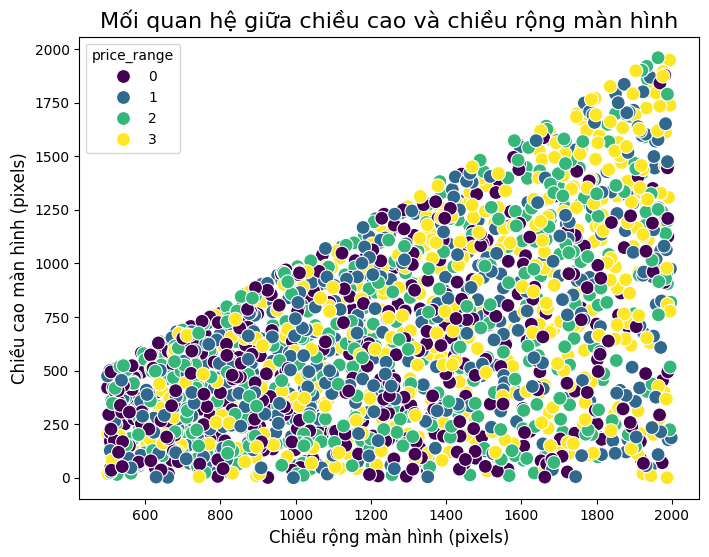

             px_height  px_width  price_range
px_height     1.000000  0.510664     0.148858
px_width      0.510664  1.000000     0.165818
price_range   0.148858  0.165818     1.000000


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='px_width', y='px_height', data=df, hue='price_range', palette='viridis', s=100)
plt.title('Mối quan hệ giữa chiều cao và chiều rộng màn hình', fontsize=16)
plt.xlabel('Chiều rộng màn hình (pixels)', fontsize=12)
plt.ylabel('Chiều cao màn hình (pixels)', fontsize=12)
plt.show()
print(df[['px_height', 'px_width', 'price_range']].corr())


> Nhận xét:
Nhóm giá cao (3) sẽ có giá trị px_height và px_width trung bình cao hơn đáng kể.
Các nhóm giá trung bình (1, 2) có  sự phân bố độ phân giải thấp hơn và biến động ngang nhau.
Nhóm giá thấp nhất (0) có độ phân giải kém hơn

#  Feature Engineering

In [ ]:
import numpy as np

# screen_size: Đường chéo màn hình, biểu thị kích thước thực tế.
df['screen_size'] = np.sqrt(df['px_height']**2 + df['px_width']**2)

# ram_int_memory_ratio: Tỷ lệ RAM so với bộ nhớ trong, đánh giá cân bằng lưu trữ.
df['ram_int_memory_ratio'] = df['ram'] / df['int_memory']

# performance_score: Điểm hiệu năng, dựa trên CPU và RAM.
df['performance_score'] = df['clock_speed'] * df['n_cores'] * df['ram']

# battery_life: Thời lượng pin ước tính, dựa trên dung lượng pin và thời gian đàm thoại.
df['battery_life'] = df['battery_power'] * df['talk_time']


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_size,ram_int_memory_ratio,performance_score,battery_life
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,1,756.264504,364.142857,11215.6,15998
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,2,2184.300575,49.641509,3946.5,7147
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,2,2130.686509,63.487805,6507.5,5067
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,2,2160.660084,276.900000,41535.0,6765
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,1,1711.200748,32.068182,3386.4,27315


In [ ]:

df = df.drop(['px_height', 'px_width', 'ram', 'int_memory', 'clock_speed', 'n_cores', 'battery_power', 'talk_time'], axis=1)
df.head()

,blue,dual_sim,fc,four_g,m_dep,mobile_wt,pc,sc_h,sc_w,three_g,touch_screen,wifi,price_range,screen_size,ram_int_memory_ratio,performance_score,battery_life
0,0,0,1,0,0.6,188,2,9,7,0,0,1,1,756.264504,364.142857,11215.6,15998
1,1,1,0,1,0.7,136,6,17,3,1,1,0,2,2184.300575,49.641509,3946.5,7147
2,1,1,2,1,0.9,145,6,11,2,1,1,0,2,2130.686509,63.487805,6507.5,5067
3,1,0,0,0,0.8,131,9,16,8,1,0,0,2,2160.660084,276.900000,41535.0,6765
4,1,0,13,1,0.6,141,14,8,2,1,1,0,1,1711.200748,32.068182,3386.4,27315


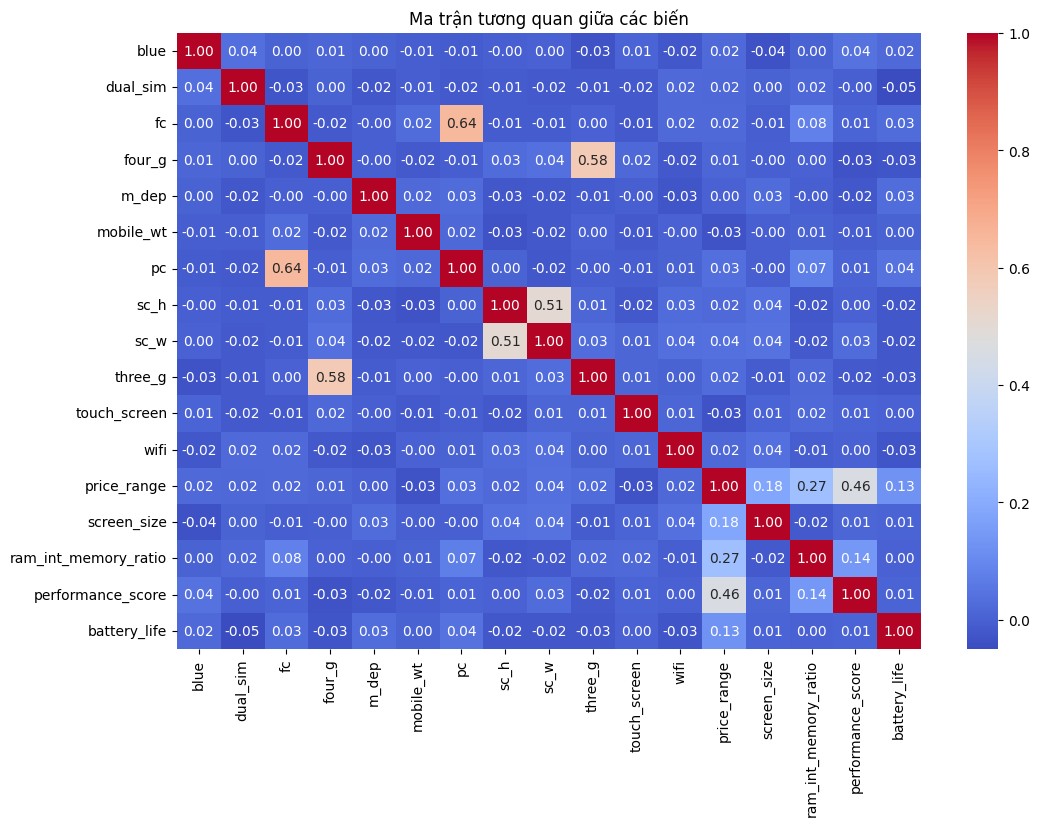

In [ ]:

# Ma trận tương quan
corr_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các biến")
plt.show()

# Data processing

In [ ]:
#

In [ ]:
# prompt: chuẩn hóa dữ liệu bằng zscore

from scipy.stats import zscore

# Assuming 'df' is your DataFrame and you want to standardize numerical columns
numerical_cols = ['mobile_wt', 'm_dep', 'sc_h', 'sc_w', 'fc', 'pc', 'screen_size', 'ram_int_memory_ratio', 'performance_score', 'battery_life']  # Replace with actual column names
numerical_cols = ['sc_h', 'sc_w', 'fc', 'pc', 'm_dep', 'mobile_wt', 'screen_size', 'ram_int_memory_ratio', 'performance_score', 'battery_life']

for col in numerical_cols:
    df[col + '_zscore'] = zscore(df[col])

print(df.head())


   blue  dual_sim  fc  four_g  m_dep  mobile_wt  pc  sc_h  sc_w  three_g  ...  \
0     0         0   1       0    0.6        188   2     9     7        0  ...   
1     1         1   0       1    0.7        136   6    17     3        1  ...   
2     1         1   2       1    0.9        145   6    11     2        1  ...   
3     1         0   0       0    0.8        131   9    16     8        1  ...   
4     1         0  13       1    0.6        141  14     8     2        1  ...   

   sc_h_zscore  sc_w_zscore  fc_zscore  pc_zscore  m_dep_zscore  \
0    -0.784983     0.283103  -0.762495  -1.305750      0.340740   
1     1.114266    -0.635317  -0.992890  -0.645989      0.687548   
2    -0.310171    -0.864922  -0.532099  -0.645989      1.381165   
3     0.876859     0.512708  -0.992890  -0.151168      1.034357   
4    -1.022389    -0.864922   2.002254   0.673534      0.340740   

   mobile_wt_zscore  screen_size_zscore  ram_int_memory_ratio_zscore  \
0          1.349249           -1.30320

# Build model


In [ ]:

from sklearn.model_selection import train_test_split

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

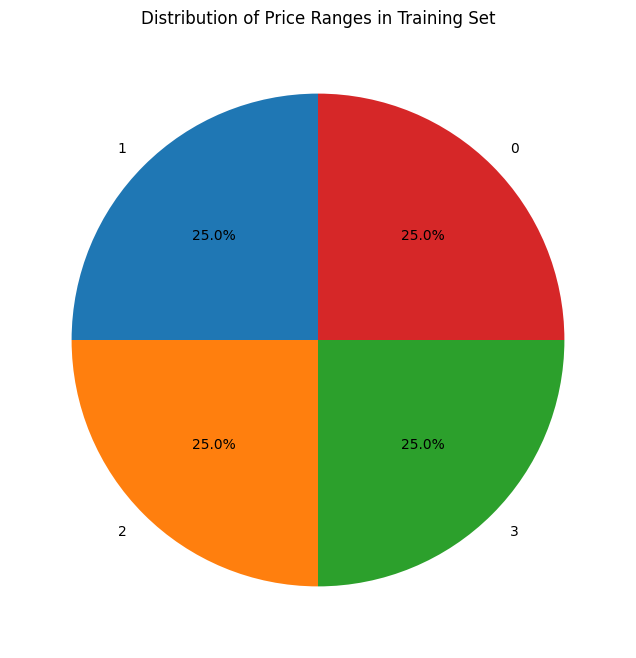

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
df['price_range'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Price Ranges in Training Set')
plt.ylabel('') # Remove the y-label
plt.show()

### LR


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       151
           1       0.26      0.25      0.26       146
           2       0.34      0.25      0.29       148
           3       0.53      0.52      0.52       155

    accuracy                           0.43       600
   macro avg       0.42      0.43      0.42       600
weighted avg       0.42      0.43      0.42       600



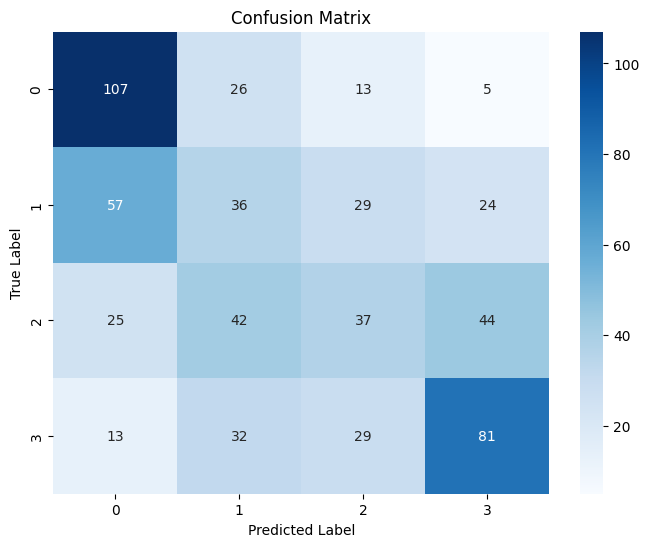

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

NameError: name 'y_pred' is not defined

### RF


In [ ]:
# prompt: # Khởi tạo mô hình Random Forest
# rf = RandomForestClassifier(random_state=42)
# # Huấn luyện mô hình
# rf.fit(X_train, y_train)
# # Dự đoán
# y_pred = rf.predict(X_test)
# # Đánh giá mô hình
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
# Huấn luyện mô hình
rf.fit(X_train, y_train)
# Dự đoán
y_pred = rf.predict(X_test)
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67       151
           1       0.38      0.30      0.33       146
           2       0.37      0.41      0.39       148
           3       0.53      0.66      0.59       155

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.49       600
weighted avg       0.50      0.50      0.50       600


Confusion Matrix:
 [[ 94  35  14   8]
 [ 25  44  47  30]
 [  7  30  60  51]
 [  5   8  40 102]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Thiết lập các giá trị siêu tham số để tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV để tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_rf = grid_search.best_estimator_

# Dự đoán với mô hình tối ưu
y_pred_best = best_rf.predict(X_test)

# Đánh giá mô hình tối ưu
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Tuned Accuracy: 0.51

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       151
           1       0.45      0.36      0.40       146
           2       0.36      0.40      0.38       148
           3       0.52      0.64      0.57       155

    accuracy                           0.51       600
   macro avg       0.52      0.51      0.51       600
weighted avg       0.52      0.51      0.51       600


Confusion Matrix:
 [[95 31 17  8]
 [19 53 46 28]
 [ 8 26 59 55]
 [ 5  8 43 99]]
